In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter, freqz

In [10]:
file = open('ecg.txt','r')
openedFile = file.read().replace('\n',' ')

data_str = openedFile.split(' ')
data_num = list(map(int,data_str))

#Tamaño del registro
TR = len(data_num)
raw_signal = np.zeros(int(TR/2))
filt_signal = np.zeros(int(TR/2))

#separar señales a partir de los datos del registro
i = 0
j = 0
while (j< TR):
  raw_signal[i] = data_num[j]
  filt_signal[i] = data_num[j+1]
  j += 2
  i += 1


# Normalizar la señal entre 0 y 1
raw_signal_min = np.min(raw_signal)
raw_signal_max = np.max(raw_signal)
raw_signal_norm = (raw_signal - raw_signal_min) / (raw_signal_max - raw_signal_min)

filt_signal_min = np.min(filt_signal)
filt_signal_max = np.max(filt_signal)
filt_signal_norm = (filt_signal - filt_signal_min) / (filt_signal_max - filt_signal_min)


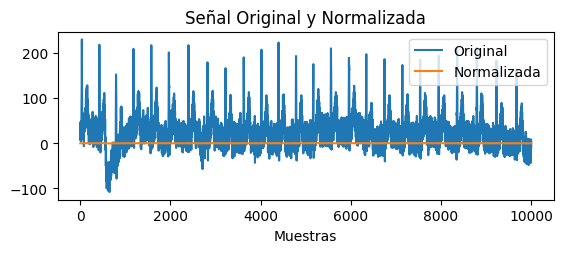

In [11]:
# Graficar señales originales y normalizadas
plt.figure(1)
plt.subplot(2, 1, 1)
plt.plot(raw_signal, label='Original')
plt.plot(raw_signal_norm, label='Normalizada')
plt.title("Señal Original y Normalizada")
plt.xlabel("Muestras")
plt.legend()

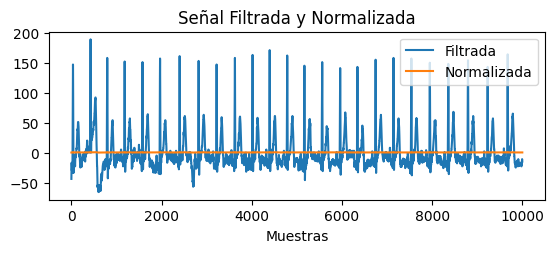

In [12]:
plt.subplot(2, 1, 2)
plt.plot(filt_signal, label='Filtrada')
plt.plot(filt_signal_norm, label='Normalizada')
plt.title("Señal Filtrada y Normalizada")
plt.xlabel("Muestras")
plt.legend()

In [13]:
# Extraer un pulso de la señal
signal_n = raw_signal[5800:6200]
signal_norm = raw_signal_norm[5800:6200]

# Tamaño en muestras del pulso
M = len(signal_n)
# Frecuencia de muestreo
fs = 500
# Periodo de muestreo
ts = 1/fs
# Vector de tiempos
t = np.arange(0, M*ts, ts)
# Condición de periodicidad
signal_n[-1] = signal_n[0]
signal_norm[-1] = signal_norm[0]

Text(0.5, 0, 'Tiempo (seg)')

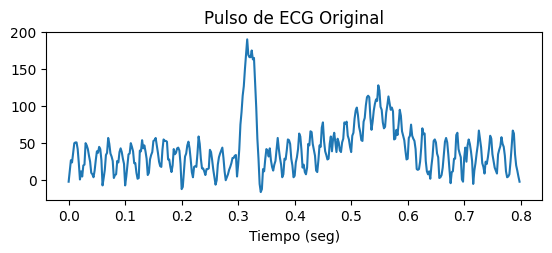

In [14]:
# Gráfica del pulso original y normalizado
plt.figure(2)
plt.subplot(2, 1, 1)
plt.plot(t, signal_n)
plt.title("Pulso de ECG Original")
plt.xlabel("Tiempo (seg)")

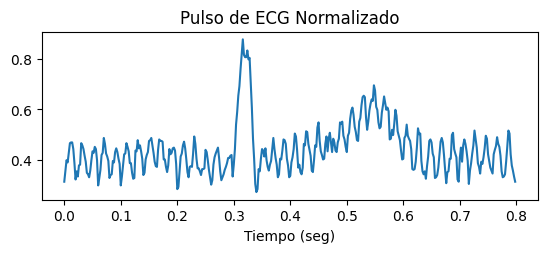

In [15]:
plt.subplot(2, 1, 2)
plt.plot(t, signal_norm)
plt.title("Pulso de ECG Normalizado")
plt.xlabel("Tiempo (seg)")
plt.show()

In [18]:
#Frecuencias de Corte en hertz del filtro rechaza banda
f1 = 48
f2 = 52
orden = 101  # Orden del filtro FIR
# Diseño del filtro FIR
coeficientes = firwin(orden, [f1, f2], pass_zero='bandstop', fs=fs)

In [19]:
# Aplicación del filtro a la señal ECG con ruido
ecg_signal_filtrada = lfilter(coeficientes, 1.0, signal_norm)

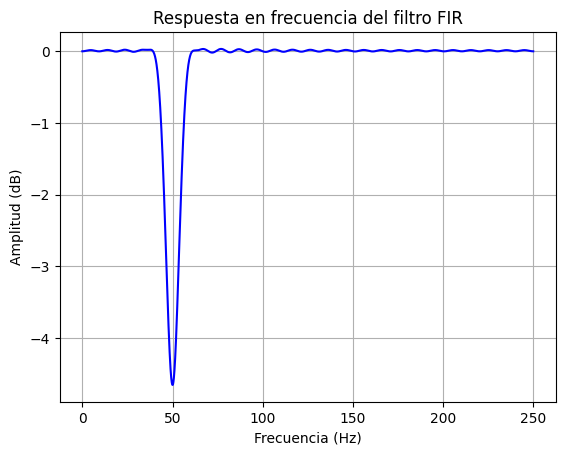

In [20]:
# Respuesta en frecuencia del filtro
w, h = freqz(coeficientes, worN=8000, fs=fs)
plt.figure()
plt.plot(w, 20 * np.log10(abs(h)), 'b')
plt.title('Respuesta en frecuencia del filtro FIR')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud (dB)')
plt.grid()

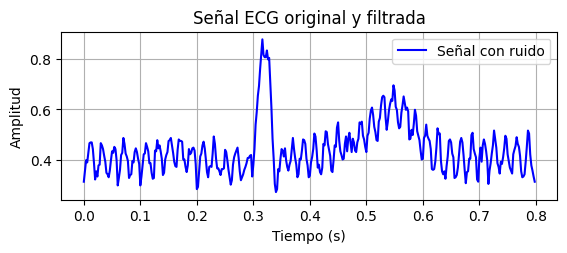

In [21]:
# Señal original y filtrada
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(t, signal_norm, 'b-', label='Señal con ruido')
plt.title('Señal ECG original y filtrada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()

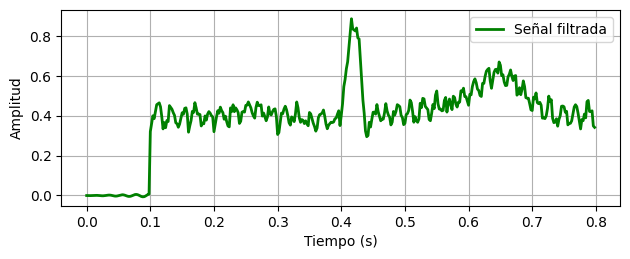

In [22]:
plt.subplot(2, 1, 2)
plt.plot(t, ecg_signal_filtrada, 'g-', linewidth=2, label='Señal filtrada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()